In [14]:
using Pkg
Pkg.instantiate()
Pkg.add("MCMCChains")
using TAMode
using Plots
using StaticArrays
using LinearAlgebra
using MCMCChains

  Resolving package versions...
   Updating `~/TAMode.jl/Project.toml`
 [no changes]
   Updating `~/TAMode.jl/Manifest.toml`
 [no changes]


In [9]:
tpsA549 = @SVector Float64[60, 240]
gasA549 = @SVector Float64[64, 16, 4, 1, 0.25, 0]
pYA549 = @SMatrix [10.8 8.3; 7.4 7.1; 7.1 7.7; 4.6 8.2; 6.1 7.2; 7.5 7.5]
totA549 = @SMatrix [3443.1 3219.7; 3143.4 3353.8; 3018.9 3611.8; 2608.9 3448.2; 2690.2 3168.1; 2672.0 2672.0]
surfA549 = @SMatrix [0.206 0.239; 0.274 0.316; 0.281 0.251; 0.220 0.302; 0.256 0.281; 0.257 0.337]
chn = read("chain-file-6_15.jls", Chains)
summarize(chn)

Summary Statistics
     parameters      mean       std  naive_se     mcse       ess   r_hat
  ─────────────  ────────  ────────  ────────  ───────  ────────  ──────
        AXLexpr  272.0385  149.2523    9.4395  85.4350    4.1904  1.2931
         Ig2rev    0.4351    0.0068    0.0004   0.0059    3.7490  1.3358
         gasCur    3.5552    1.1239    0.0711   0.8806    2.1516  2.7077
    internalize    1.1358    0.0528    0.0033   0.0064  322.0704  1.0024
           kDeg    0.0884    0.0598    0.0038   0.0321    4.4226  1.2454
           kRec    0.0983    0.0112    0.0007   0.0005   26.0719  0.9970
  pYinternalize    0.2872    0.0890    0.0056   0.0567    3.7531  1.4090
          scale    0.0070    0.0003    0.0000   0.0001   14.5918  1.0707
      scaleSurf    0.0009    0.0002    0.0000   0.0001    5.7130  1.1423
          sortF    0.9897    0.0062    0.0004   0.0043    3.9666  1.3612
           xFwd    7.7280    4.9551    0.3134   3.7440    2.0456  3.2791


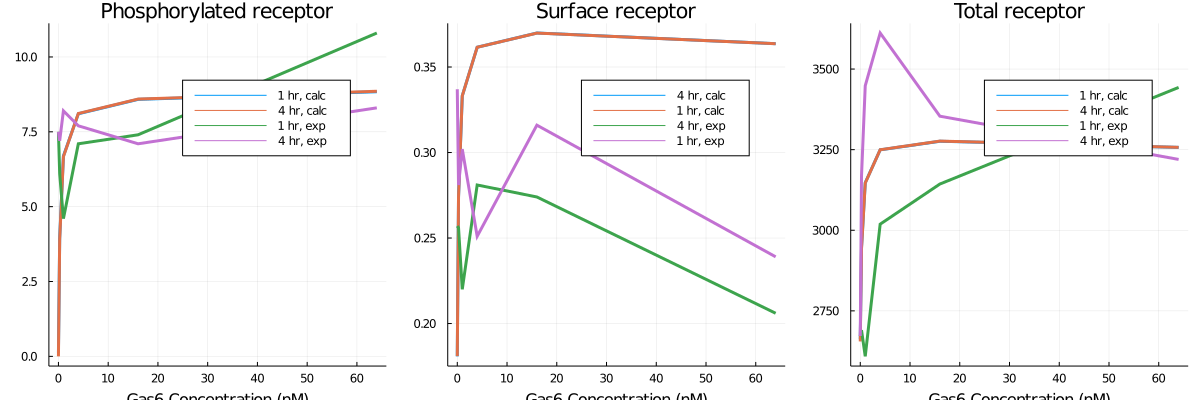

In [10]:
using Statistics
x = get(chn, [:internalize, :pYinternalize, :sortF, :kRec, :kDeg, :xFwd, :gasCur, :AXLexpr])
samp_params = hcat(x.internalize, x.pYinternalize, x.sortF, x.kRec, x.kDeg, x.xFwd, x.gasCur, x.AXLexpr)

Ig2rev = get(chn, :Ig2rev)[1];
scale = get(chn, :scale)[1];

scaleSurf = get(chn, :scaleSurf)[1];
pY = Array{Float64}(undef, size(samp_params, 1), length(tpsA549), length(gasA549));
tot = Array{Float64}(undef, size(samp_params, 1), length(tpsA549), length(gasA549));
surf = Array{Float64}(undef, size(samp_params, 1), length(tpsA549), length(gasA549));

for iter = 1:size(samp_params, 1)
    params = vcat(samp_params[iter, :], zeros(2), Ig2rev[iter], ones(4))
    pY[iter, :, :], tot[iter, :, :], surf[iter, :, :] = TAMode.dataModelCalc(tpsA549, gasA549, params, scale[iter], scaleSurf[iter])
end 

medpY = Statistics.median(pY, dims = 1);
medtot = Statistics.median(tot, dims = 1);
medsurf = Statistics.median(surf, dims = 1);
stdsurf = Statistics.std(surf, dims = 1);
meanpY = Statistics.mean(pY, dims = 1);
meantot = Statistics.mean(tot, dims = 1);
meansurf = Statistics.mean(surf, dims = 1);

tp1_calcmed = hcat(transpose(medpY[:,1,:]), transpose(medsurf[:,1,:]), transpose(medtot[:,1,:]));
tp2_calcmed = hcat(transpose(medpY[:,2,:]), transpose(medsurf[:,2,:]), transpose(medtot[:,2,:]));
tp1_exp = hcat(pYA549[:,1], surfA549[:,1], totA549[:,1]);
tp2_exp = hcat(pYA549[:,2], surfA549[:,2], totA549[:,2]);

### meadian
plot(gasA549, [tp1_calcmed, tp2_calcmed], 
        label=["1 hr, calc" "4 hr, calc"] , 
        title=["Phosphorylated receptor" "Surface receptor" "Total receptor"], 
        lw=3, 
        layout = (1,3), 
        size=(1200,400))
plot!(gasA549, [tp1_exp, tp2_exp], 
        label=["1 hr, exp" "4 hr, exp"], 
        lw=3,
        layout=(1,3))
        xlabel!("Gas6 Concentration (nM)")

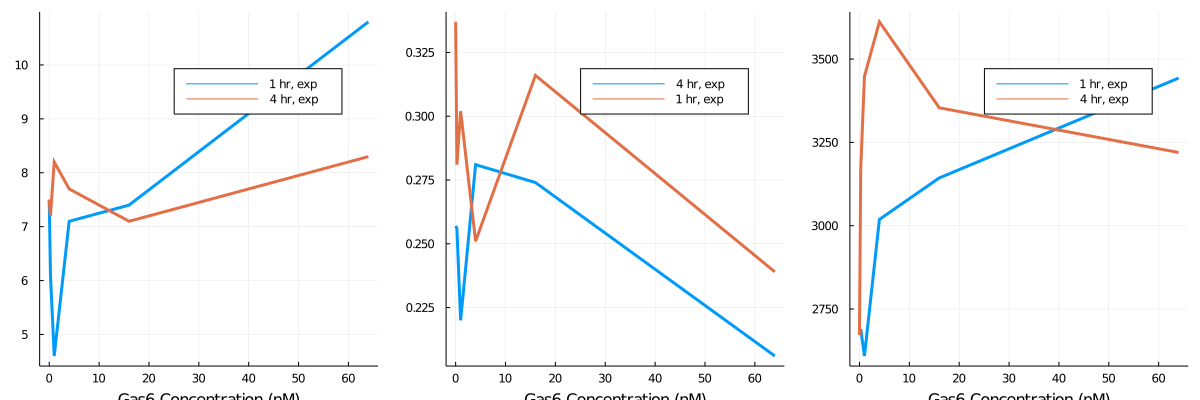

In [12]:
plot(gasA549, [tp1_exp, tp2_exp], 
        label=["1 hr, exp" "4 hr, exp"], 
        lw=3,
        layout=(1,3),
        size=(1200,400))
        xlabel!("Gas6 Concentration (nM)")

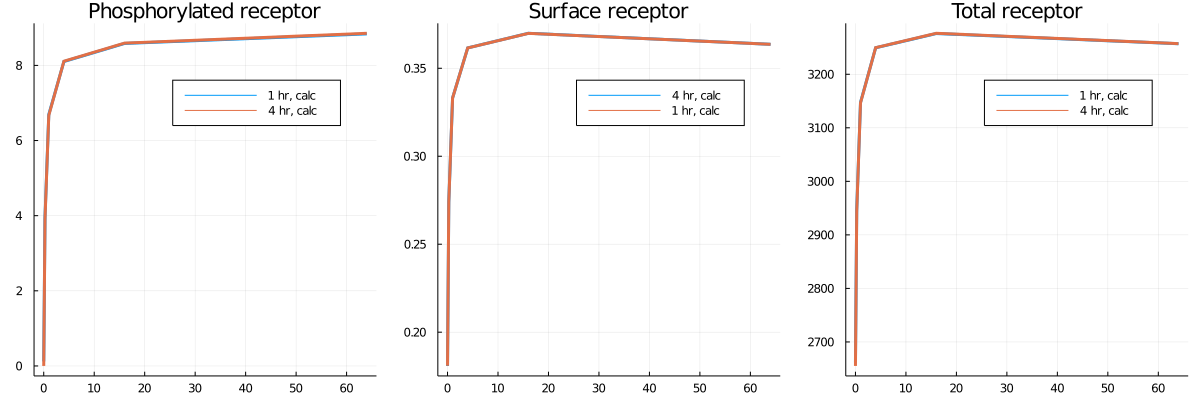

In [13]:
plot(gasA549, [tp1_calcmed, tp2_calcmed], 
        label=["1 hr, calc" "4 hr, calc"] , 
        title=["Phosphorylated receptor" "Surface receptor" "Total receptor"], 
        lw=3, 
        layout = (1,3), 
        size=(1200,400))